                                                TASK-04
    
   Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Step 1: Load Data in Python

In [1]:
import pandas as pd

df = pd.read_csv("twitter_training.csv")  

print(df.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [2]:
df.columns = ['GameID', 'GameName', 'Sentiment', 'TweetText']
print(df.head())

   GameID     GameName Sentiment  \
0    2401  Borderlands  Positive   
1    2401  Borderlands  Positive   
2    2401  Borderlands  Positive   
3    2401  Borderlands  Positive   
4    2401  Borderlands  Positive   

                                           TweetText  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


Step 2: Preprocess the Data

In [3]:
import re
df['clean_sentence'] = df['TweetText'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)).lower())

Step 3: Explore the Data

In [4]:
print(df['Sentiment'].value_counts())

# Entities mentioned
print(df['GameName'].value_counts())

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
Cyberpun

Step 4: Visualize Sentiment Distribution

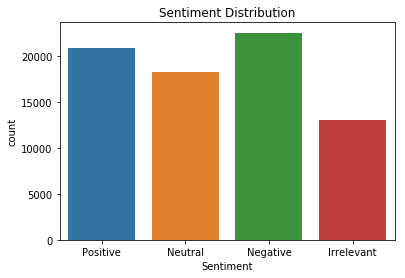

In [5]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


Step 6: Visualize Entity-Wise Sentiment

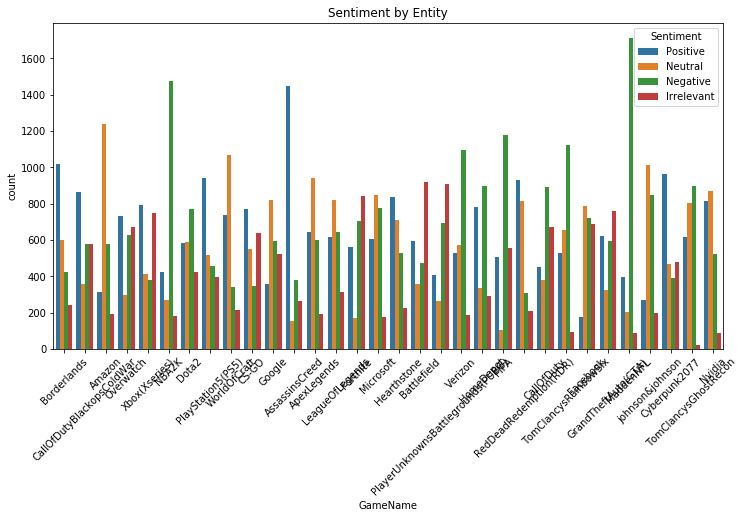

In [6]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='GameName', hue='Sentiment')
plt.xticks(rotation=45)
plt.title("Sentiment by Entity")
plt.show()


 Step 7: Word Cloud 

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()
df['sentiment'] = df['Sentiment'].str.lower()


for sentiment in ['positive', 'neutral', 'negative','irrelevant']:
    text = " ".join(df[df['Sentiment'] == sentiment]['clean_sentence'].dropna())
    
    if len(text.strip()) > 0:
        wordcloud = WordCloud(background_color='white').generate(text)

        plt.figure(figsize=(6, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
        plt.show()
    else:
        print(f"⚠️ No data available for sentiment: {sentiment}")


⚠️ No data available for sentiment: positive
⚠️ No data available for sentiment: neutral
⚠️ No data available for sentiment: negative
⚠️ No data available for sentiment: irrelevant


Step:8 Train a Sentiment Classifier

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_sentence'])
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

 Irrelevant       0.82      0.59      0.69      2661
   Negative       0.71      0.86      0.77      4471
    Neutral       0.80      0.63      0.70      3551
   Positive       0.72      0.81      0.76      4254

avg / total       0.75      0.74      0.74     14937

